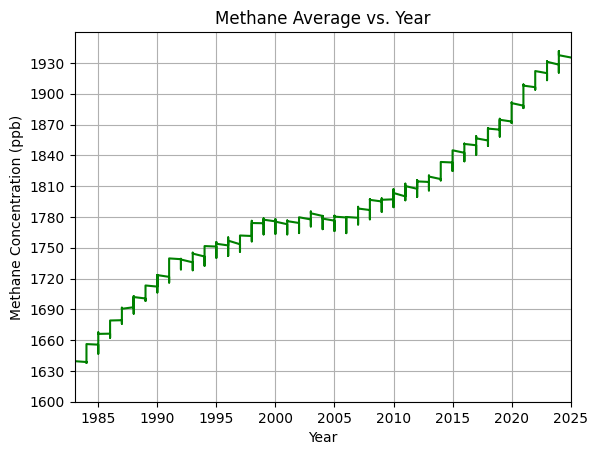

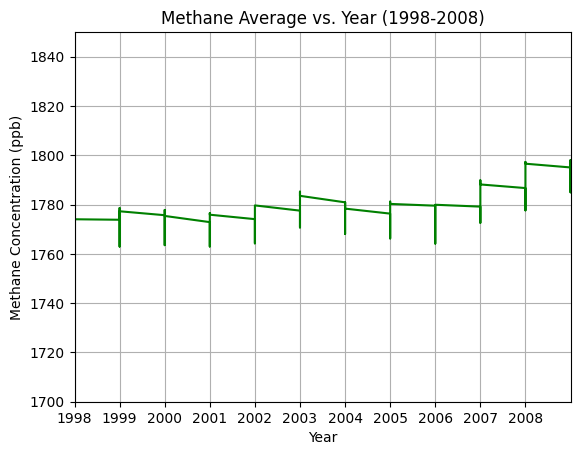

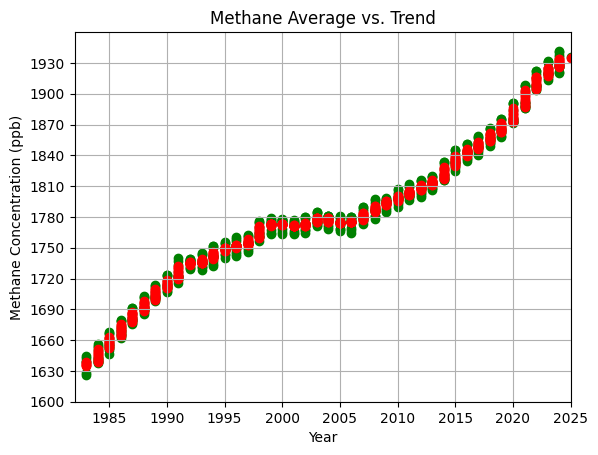

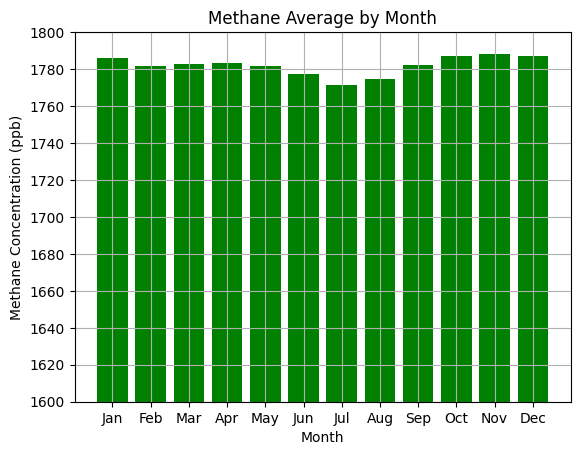

In [2]:
# FINAL PROJECT
# Proj plan:
# Plot the methane average over time (line graph)
# Plot monthly averages (e.g., average for each month across years)
# Compare average vs. trend
# Find peak years or months using sorting and logic
# Compute:
#   Mean change per year
#   Max increase/decrease
#   Rolling average or percentage change


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

os.chdir("/content/drive/MyDrive/Colab Notebooks/Homework Assignments")
import Methane as methane

filepath = "/content/drive/MyDrive/Colab Notebooks/Homework Assignments/enoheaderMETHANE-data.csv"
data = pd.read_csv(filepath)


yr = np.array(data.iloc[:, 0]) # assigning variable names
month = np.array(data.iloc[:, 1])
dec = np.array(data.iloc[:, 2])
ppb = np.array(data.iloc[:, 3])
unc = np.array(data.iloc[:, 4])
trend = np.array(data.iloc[:, 5])

# plotting first graph (methane concentration ave 1983-2025)
fig, ax = plt.subplots()
ax.plot(yr, ppb, color = "green")  # x = year, y = methane avg (ppb)
ax.set_xlabel("Year")
ax.set_ylabel("Methane Concentration (ppb)")
ax.set_title("Methane Average vs. Year")
ax.set_xlim([1983, 2025])
ax.set_ylim([1600, 1960])
ax.set_yticks(range(1600, 1960, 30))
ax.grid(True)

plt.show()

# plotting average ppb 1990-2008
fig, ax = plt.subplots()
ax.plot(yr, ppb, color = "green")  # x = year, y = methane avg (ppb)
ax.set_xlabel("Year")
ax.set_ylabel("Methane Concentration (ppb)")
ax.set_title("Methane Average vs. Year (1998-2008)")
ax.set_xlim([1998, 2009])
ax.set_ylim([1700, 1850])
ax.set_yticks(range(1700, 1850, 20))
ax.set_xticks(range(1998, 2009, 1))
ax.grid(True)
plt.show()



# plotting average vs trend line graph:
fig, ax = plt.subplots()
plt.scatter(yr, ppb, color = "green")
plt.scatter(yr, trend, color = "red")
ax.set_xlabel("Year")
ax.set_ylabel("Methane Concentration (ppb)")
ax.set_title("Methane Average vs. Trend")
ax.set_xlim([1982, 2025])
ax.set_ylim([1600, 1960])
ax.set_yticks(range(1600, 1960, 30))

ax.grid(True)


# plot the bar chart
monthly_avg = methane.avg_ppb_by_month(ppb, month) # group by month and calculate the average ppb
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots()
ax.bar(range(1, 13), monthly_avg, width = .8, color = 'green')
ax.set_xlabel("Month")
ax.set_ylabel("Methane Concentration (ppb)")
ax.set_title("Methane Average by Month")
ax.grid(True)
ax.set_ylim([1600, 1800])
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names)
ax.set_yticks(range(1600, 1801, 20))

plt.show()


In [4]:
# max increase and decrease in data


month_changes = methane.max_change(yr, ppb) #calling max_change function from lib

max_increase = month_changes["max_increase"]
year_increase = month_changes["year_of_max_inc"]

max_decrease = month_changes["max_decrease"]
year_decrease = month_changes["year_of_max_dec"]

print(f"The maximum increase in data was {round(max_increase,2)} ppb in the year {year_increase}.")
print(f"The maximum decrease in data was {round(max_decrease,2)} ppb in the year {year_decrease}.")

print(f"The total change in methane concentration from 1983 to 2025 is {round(methane.total_change(ppb),2)} ppb")



The maximum increase in data was 10.48 ppb in the year 1998.
The maximum decrease in data was -6.46 ppb in the year 2000.
The total change in methane concentration from 1983 to 2025 is 309.37 ppb


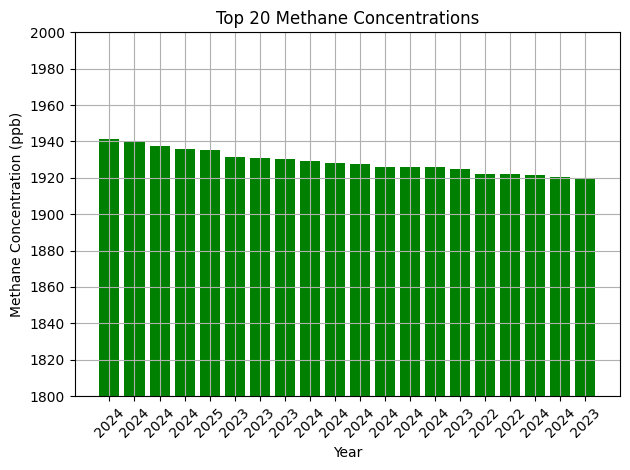

In [13]:
# graph for sorted ppb (high to low)

sorted_values_desc = methane.sort_ppb(ppb)
years = methane.finding_years(yr, ppb, sorted_values_desc) # values for x and y

x_pos = list(range(len(sorted_values_desc)))

fig, ax = plt.subplots()
ax.bar(x_pos, sorted_values_desc, color='green')

ax.set_title("Top 20 Methane Concentrations")
ax.set_xlabel("Year")
ax.set_ylabel("Methane Concentration (ppb)")
ax.grid(True)
ax.set_ylim([1800, 2000])
ax.set_yticks(range(1800, 2001, 20))
ax.set_xticks(x_pos)
ax.set_xticklabels([str(year) for year in years], rotation=45) # unique x positions so it doesn't overlap

plt.tight_layout()
plt.show()
